In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tawfikelmetwally/employee-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/tawfikelmetwally/employee-dataset/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
df=pd.read_csv("Employee.csv")
print(df.head())
print(df.dtypes)

# Generate descriptive statistics for numerical features
print(df.describe())

# Explore the distribution of categorical features
for col in ['Education', 'City', 'Gender','EverBenched']:
  print(df[col].value_counts())

   Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1  
Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDo

<Figure size 1000x600 with 0 Axes>

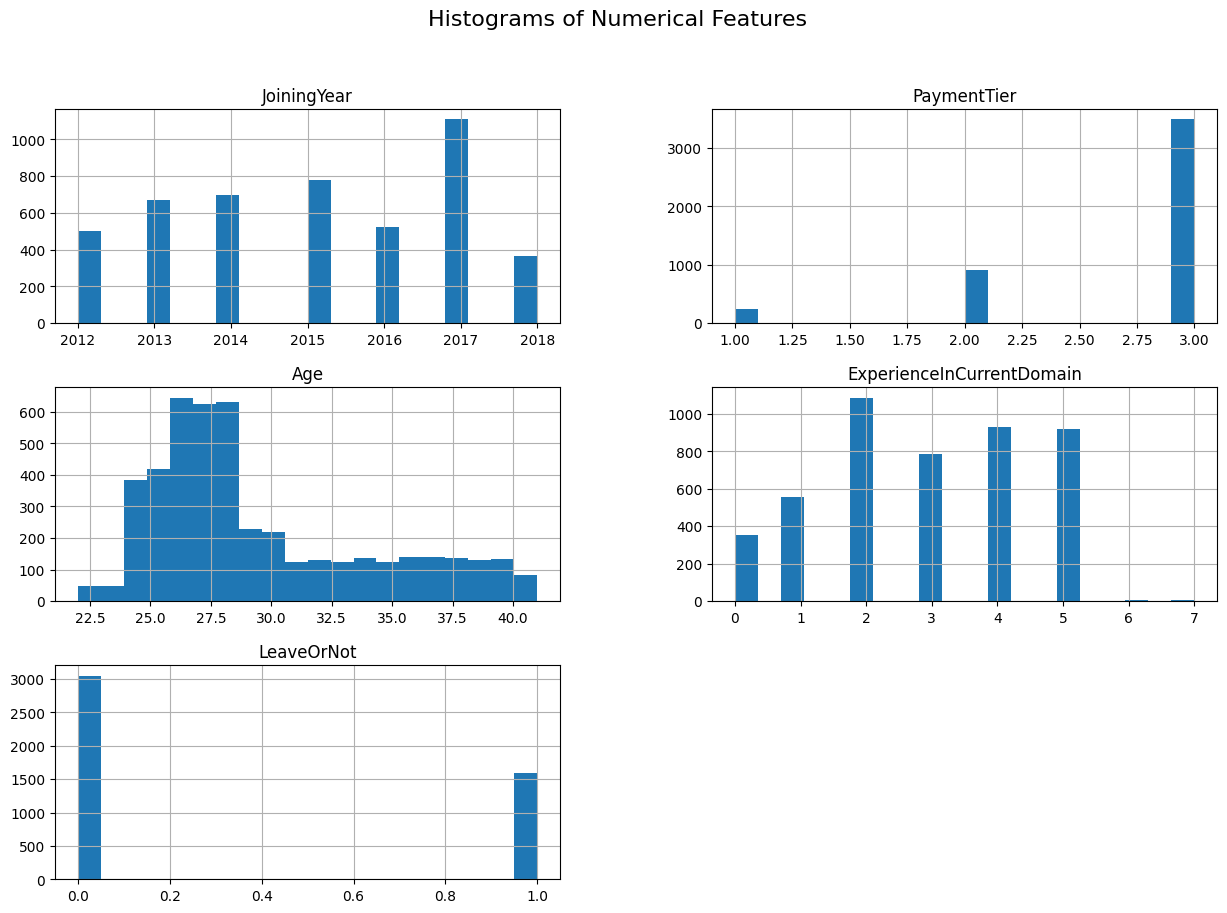

In [ ]:
## i. Histograms
plt.figure(figsize=(10, 6))
df.hist(bins=20, figsize=(15,10))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

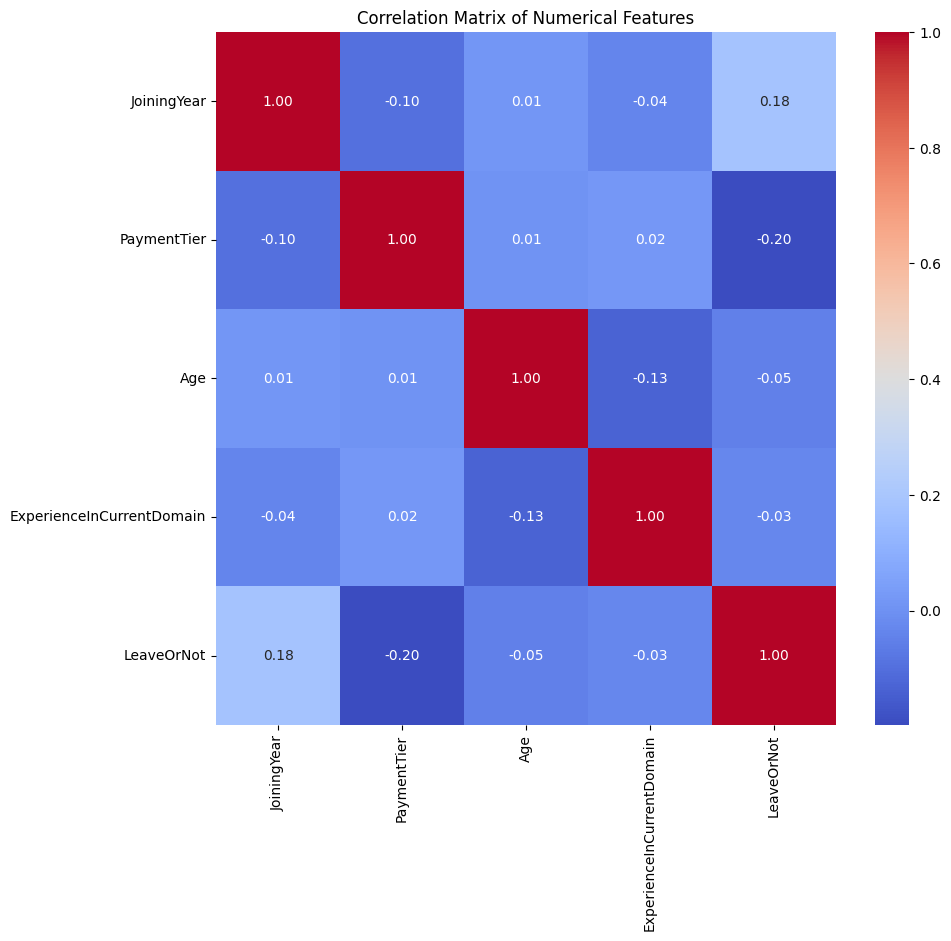

In [ ]:
# ii. Correlations (Heatmap)
plt.figure(figsize=(10,9))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

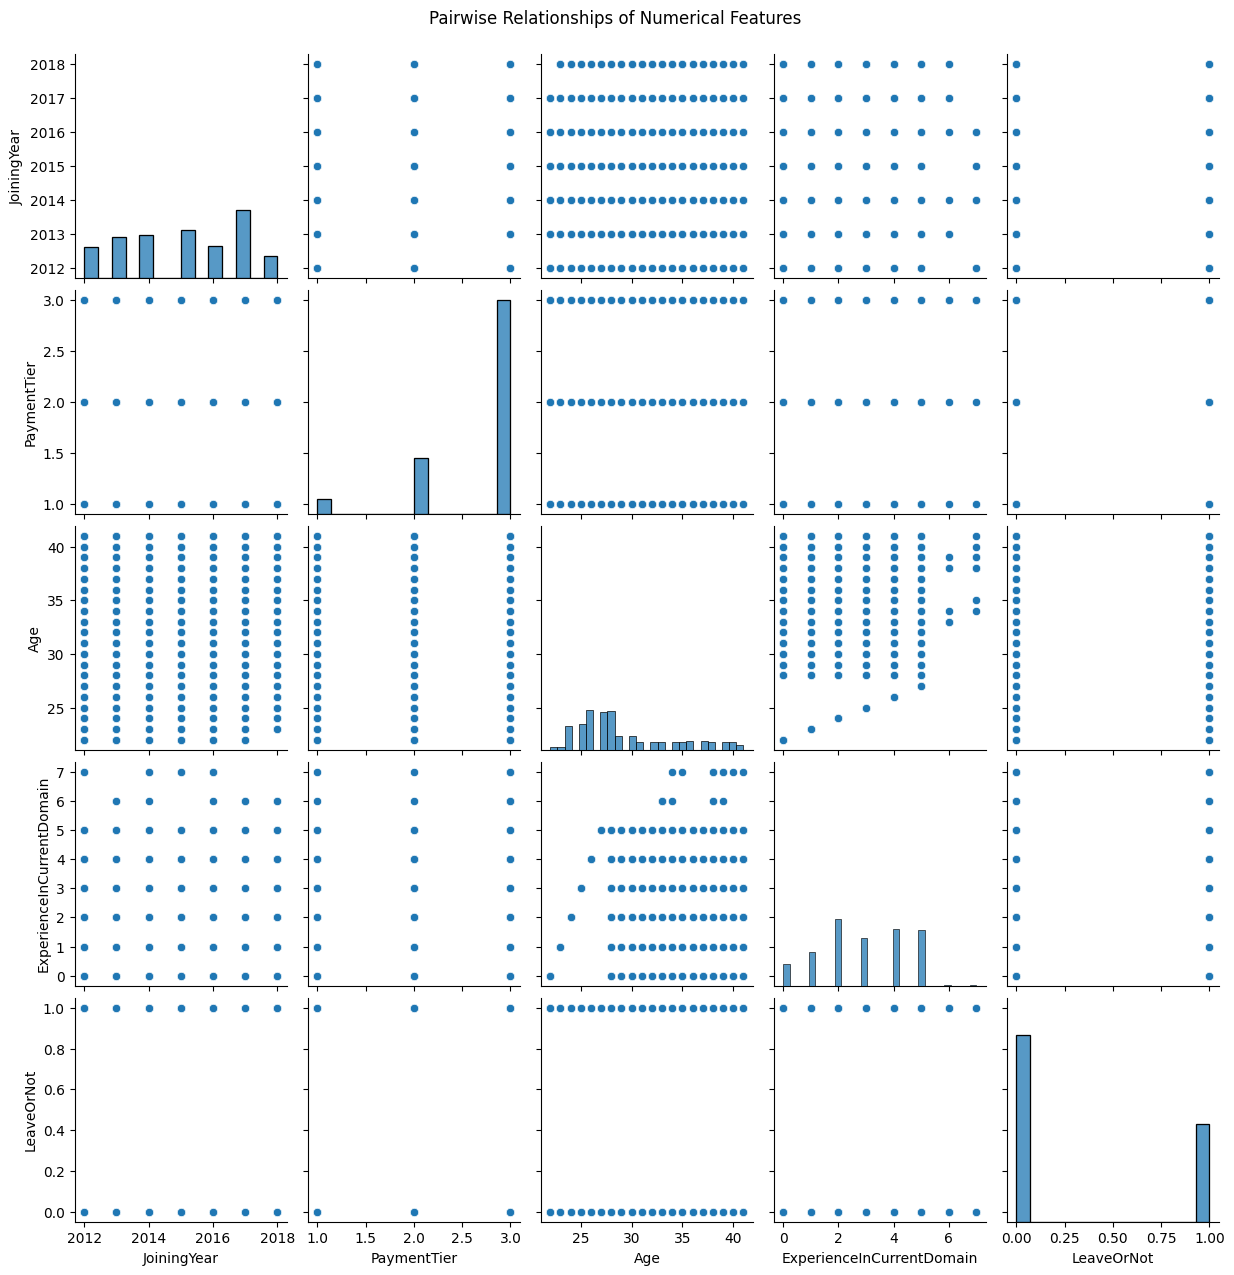

In [ ]:
#iii. Pairwise Plots
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
sns.pairplot(df[numerical_features])
plt.suptitle('Pairwise Relationships of Numerical Features', y=1.02)
plt.show()


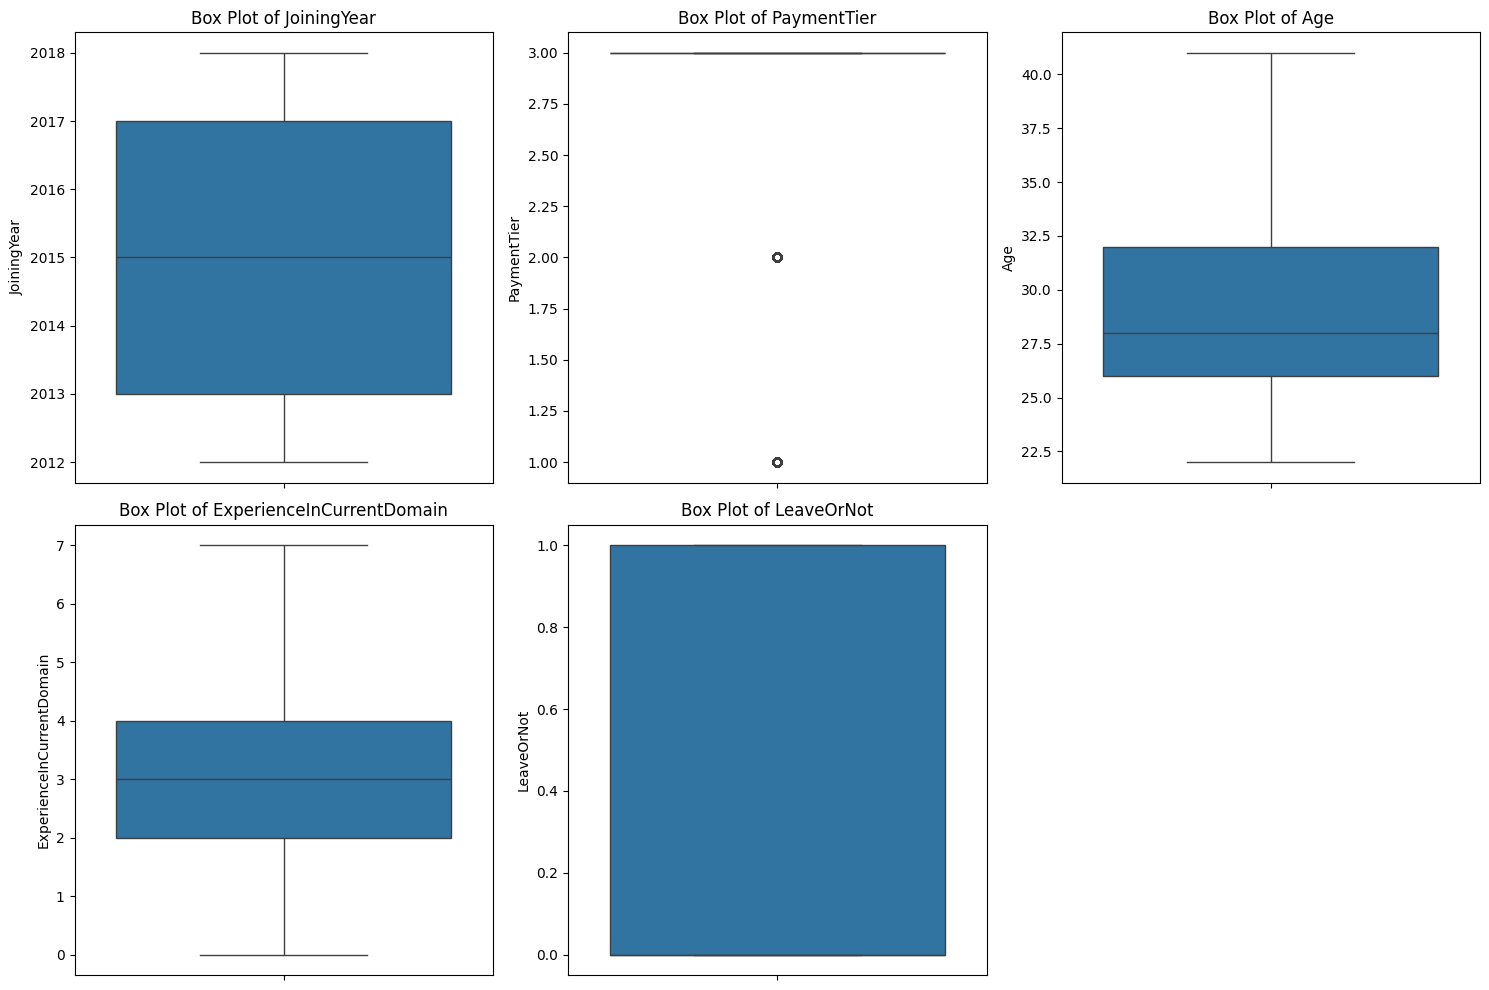

In [ ]:
# iv. Box Plots
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
plt.show()

# **SINCE WE HAVE THE DATA THAT HAS NO  NULL  VALE THERE IS NO USE FOR IT TO BE HANDLEDHHERE**

In [ ]:

# prompt: Check for missing values and handle them appropriately.
#  Check for outliers and handle them appropriately.

# Check for missing values
print(df.isnull().sum())

#COMMENT THE HANDLE TASK BEFORE EXCUTION OF THIS HANDLE LINE FOR BOTH.
# Handle missing values (example: fill with mean for numerical, mode for categorical)
#for col in df.select_dtypes(include=np.number).columns:
  #  df[col].fillna(df[col].mean(), inplace=True) # Use fillna with mean

#for col in df.select_dtypes(exclude=np.number).columns:
   # df[col].fillna(df[col].mode()[0], inplace=True) # Use fillna with mode
# Check for outliers using IQR

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


In [ ]:
# Check for outliers using IQR
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the upper and lower bounds
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

for col in ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']:
    df = handle_outliers(df, col)

# Now df should have handled missing values and outliers.
print(df.isnull().sum()) # Check for missing values again
print(df.describe()) # Check descriptive statistics again to see the effect of outlier handling

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64
       JoiningYear  PaymentTier          Age  ExperienceInCurrentDomain  \
count  4653.000000       4653.0  4653.000000                4653.000000   
mean   2015.062970          3.0    29.393295                   2.905652   
std       1.863377          0.0     4.826087                   1.558240   
min    2012.000000          3.0    22.000000                   0.000000   
25%    2013.000000          3.0    26.000000                   2.000000   
50%    2015.000000          3.0    28.000000                   3.000000   
75%    2017.000000          3.0    32.000000                   4.000000   
max    2018.000000          3.0    41.000000                   7.000000   

        LeaveOrNot  
count  4653

In [ ]:
# prompt: check  data set is baclanced or not
# Check class distribution for 'ExperienceInCurrentdomain'
target = df['LeaveOrNot'].value_counts()#here target coulums helps us to check the balace  in set we want to use in the data
print(target)

LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64


<ipython-input-15-ac4c6033f647>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LeaveOrNot', data=df,palette='crest')


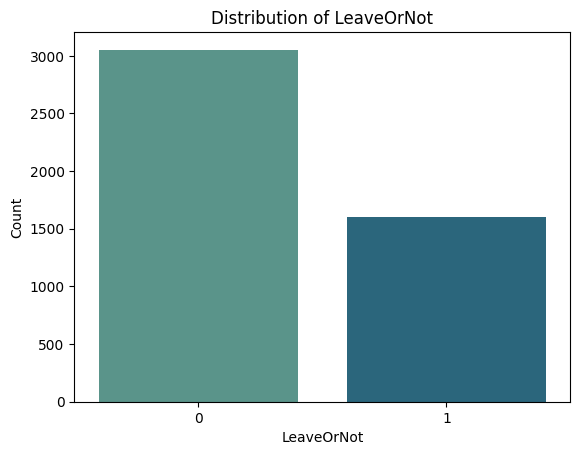

In [ ]:
# Visualize the class distribution
sns.countplot(x='LeaveOrNot', data=df,palette='crest')
plt.title('Distribution of LeaveOrNot')
plt.xlabel('LeaveOrNot')
plt.ylabel('Count')
plt.show()

# **Task 2**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder
from sklearn.compose import ColumnTransformer # Import ColumnTransformer

# Split the data for training and testing
X = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical features
categorical_features = ['Education', 'City', 'Gender', 'EverBenched']  # Add all your categorical columns

# Create a ColumnTransformer to apply OneHotEncoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', X.select_dtypes(exclude=['object']).columns.tolist()), # Numerical features are passed through
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)], # Apply OneHotEncoder to categorical features
    remainder='drop'  # Drop other columns if any
)
# Preprocess the data using ColumnTransformer
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test) # Transform X_test using the same encoding

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_encoded, y_train)  # Use the encoded data for training

# Continue with the rest of your code ...

LinearRegression()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Dictionary to store trained models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),  #  probability estimates for ROC-AUC
    'KNN': KNeighborsClassifier()
}

# Train models and store them
trained_models = {}
for name, model in models.items():
    model.fit(X_train_encoded, y_train)
    trained_models[name] = model


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Task 3** Evaluate each model using the following metrics:
# o Accuracy
# o Precision
# o Recall
# o F1 Score
# o ROC-AUC Score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Evaluate models
results = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test_encoded)

    if name == 'SVM': # Handle probabilities for ROC-AUC
        y_prob = model.predict_proba(X_test_encoded)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
      try:
        y_prob = model.predict_proba(X_test_encoded)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
      except AttributeError:
        roc_auc = 'Not applicable'

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC-AUC Score': roc_auc
    }

# Display results in a table
print("{:<20} {:<10} {:<10} {:<10} {:<10} {:<10}".format(
    "Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC Score"
))
for name, metrics in results.items():
    print("{:<20} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10}".format(
        name, metrics['Accuracy'], metrics['Precision'], metrics['Recall'], metrics['F1 Score'], metrics['ROC-AUC Score']
    ))

Model                Accuracy   Precision  Recall     F1 Score   ROC-AUC Score
Logistic Regression  0.7497     0.7115     0.4611     0.5595     0.8063530973903272
Decision Tree        0.8088     0.7527     0.6636     0.7053     0.8063530973903272
Random Forest        0.8303     0.7921     0.6885     0.7367     0.8063530973903272
SVM                  0.6552     0.0000     0.0000     0.0000     0.8063530973903272
KNN                  0.7948     0.7500     0.6075     0.6713     0.8063530973903272


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


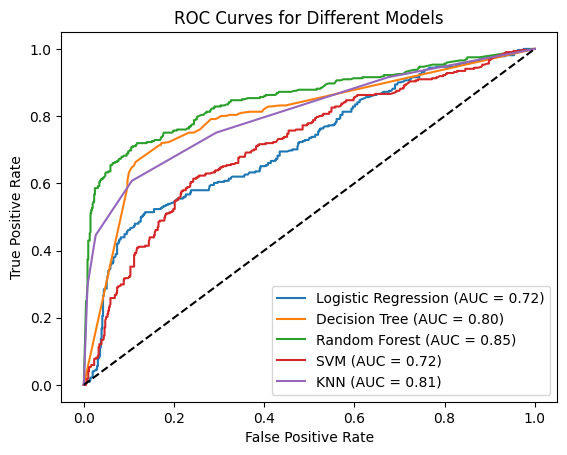

Model                Accuracy   Precision  Recall     F1 Score   ROC-AUC Score
Logistic Regression  0.7497     0.7115     0.4611     0.5595     0.7163    
Decision Tree        0.8088     0.7527     0.6636     0.7053     0.8022    
Random Forest        0.8303     0.7921     0.6885     0.7367     0.8535    
SVM                  0.6552     0.0000     0.0000     0.0000     0.7166    
KNN                  0.7948     0.7500     0.6075     0.6713     0.8064    

The best performing model based on ROC-AUC score is: Random Forest


In [ ]:
# prompt: Plot the ROC curve for all models in a single graph.
# 3. Compare the performances of the models based on these metrics and find out which model performs
# best for this task.

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

for name, model in trained_models.items():
    y_pred_proba = model.predict_proba(X_test_encoded)[:, 1]  # Probability of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    results[name]['ROC-AUC Score'] = roc_auc #update the results dict

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.show()

#Now you have the roc curves plotted and the roc_auc in results dictionary
# Display results in a table
print("{:<20} {:<10} {:<10} {:<10} {:<10} {:<10}".format(
    "Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC Score"
))
for name, metrics in results.items():
    print("{:<20} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(
        name, metrics['Accuracy'], metrics['Precision'], metrics['Recall'], metrics['F1 Score'], metrics['ROC-AUC Score']
    ))


best_model = max(results, key=lambda x: results[x]['ROC-AUC Score'])
print(f"\nThe best performing model based on ROC-AUC score is: {best_model}")